In [10]:
import wget

In [4]:
#wget.download('https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/rscbjbr9sj-2.zip')

'rscbjbr9sj-2.zip'

In [5]:
import zipfile

In [8]:
with zipfile.ZipFile("ChestXRay2017.zip", "r" ) as zip_ref:
    zip_ref.extractall()

In [11]:
from fastai.vision import *

In [12]:
path = Path('chest_xray')

In [13]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

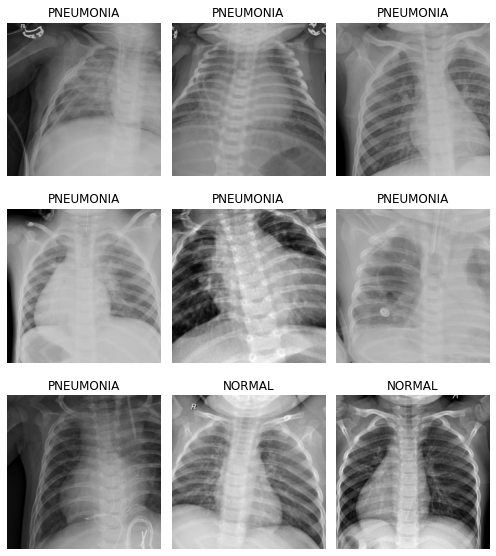

In [14]:
data.show_batch(rows=3, figsize=(7,8))

In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['NORMAL', 'PNEUMONIA'], 2, 4685, 1171)

In [16]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.529089,0.299053,0.086251,01:36
1,0.329380,0.221494,0.071734,01:38
2,0.219244,0.245057,0.082835,01:38
3,0.187331,0.215145,0.069172,01:38


In [21]:
learn.save('stage1')

In [ ]:
learn.load('stage1');

In [34]:
learn.unfreeze()

In [35]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [39]:
help(learn.lr_find())

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Help on NoneType object:

class NoneType(object)
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



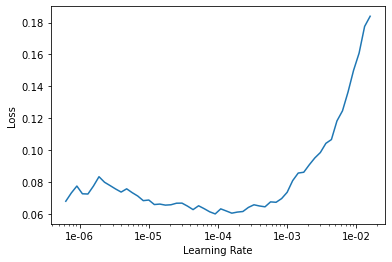

In [40]:
learn.recorder.plot()

In [41]:
learn.fit_one_cycle(4, max_lr=slice(2e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.055294,0.086087,0.031597,01:37
1,0.052207,0.097701,0.033305,01:38
2,0.048409,0.095095,0.034159,01:36
3,0.042494,0.089253,0.030743,01:37


In [42]:
learn.save('stage-2')

In [62]:
learn = load_learner(path)

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

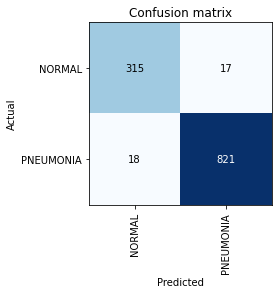

In [44]:
interp.plot_confusion_matrix()

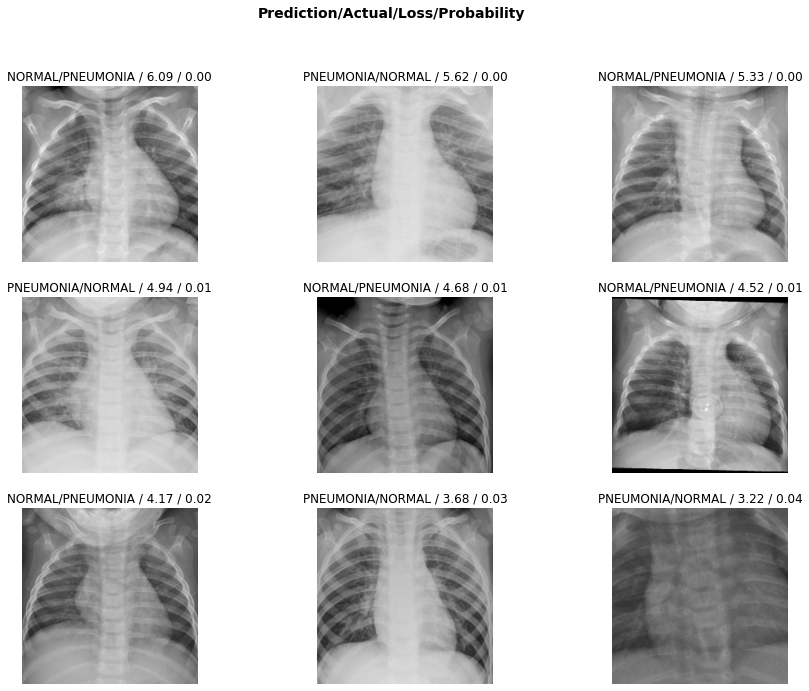

In [45]:
interp.plot_top_losses(9, figsize = (15,11))

In [63]:
learn.load('stage-2');

In [64]:
learn.export()

In [65]:
defaults.device = torch.device('cpu')

In [66]:
learn = load_learner(path)

In [49]:
classes = ['NORMAL','PNEUMONIA']

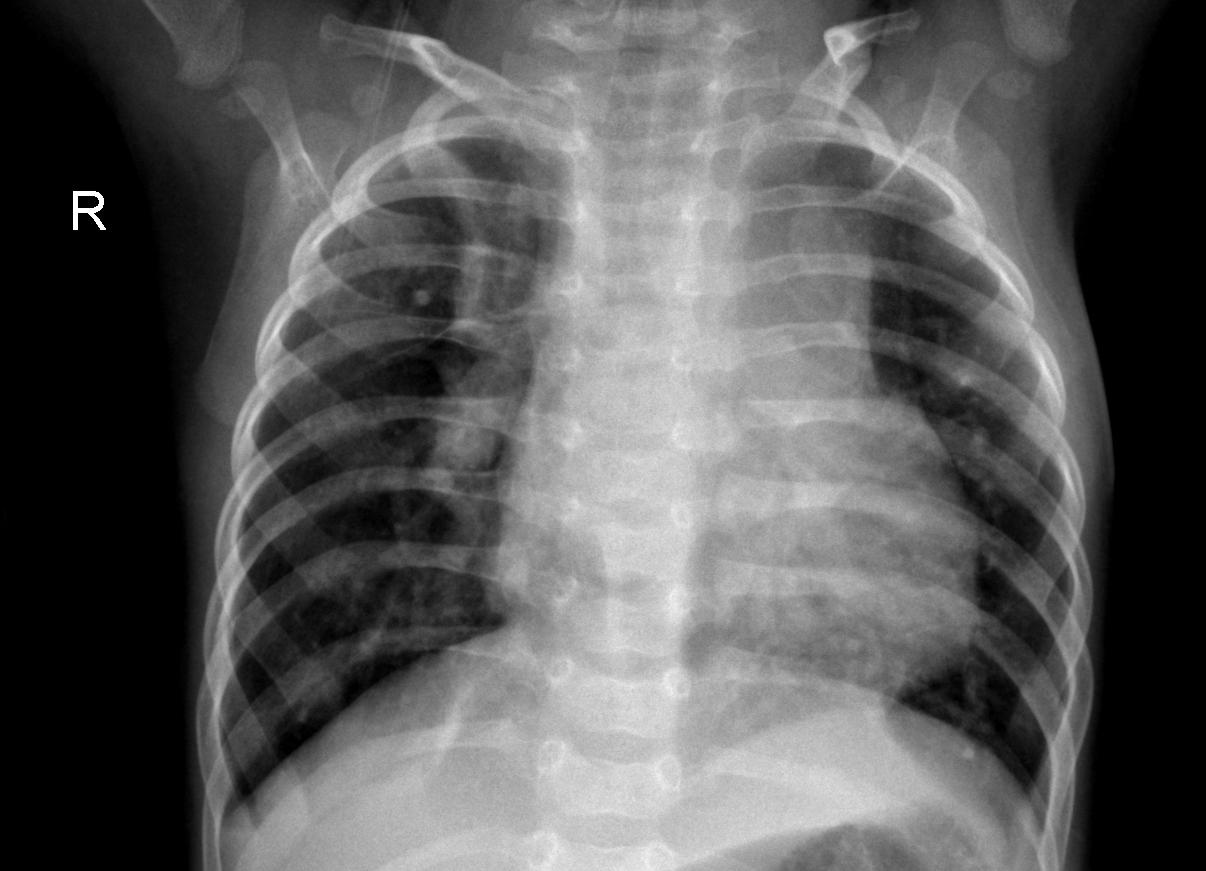

In [67]:
data2 = open_image(path/'test'/'PNEUMONIA'/'person103_bacteria_490.jpeg')
data2

In [68]:
pred_class,pred_idx,outputs = learn.predict(data2)
pred_class

Category tensor(1)